         P1        P2
0 -0.481788 -0.692990
1 -0.537375  0.527810
2  0.320760  0.265224
3 -0.562994 -0.503868
4  0.320512 -0.254466

Explained Variance Ratio by PCA Components:
[0.29255562 0.18306542]


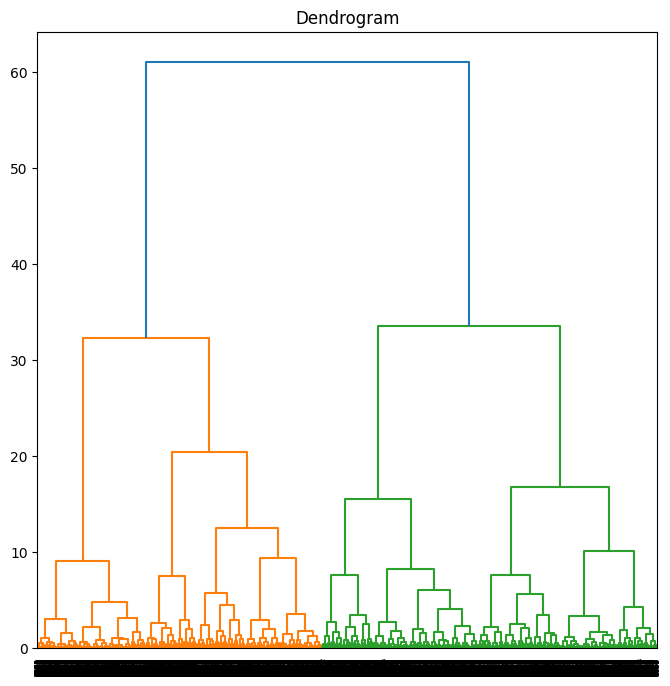

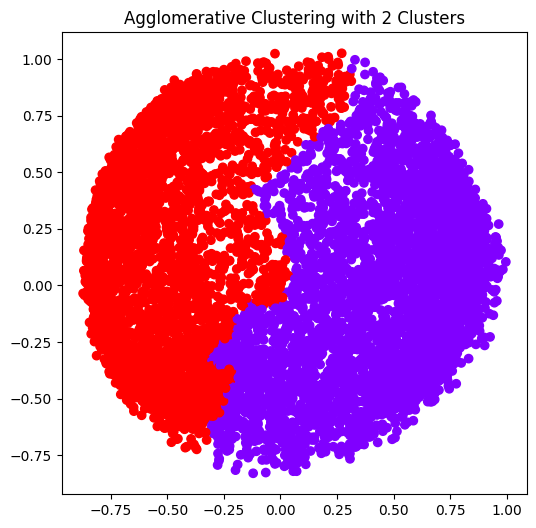

Silhouette Score for 2 clusters: 0.4232140653486487


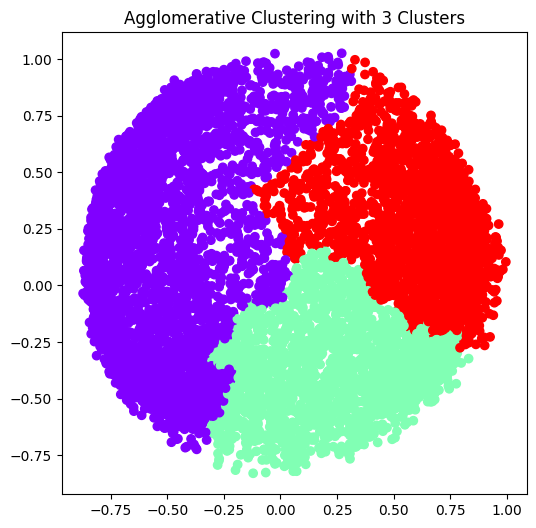

Silhouette Score for 3 clusters: 0.3648193444305517


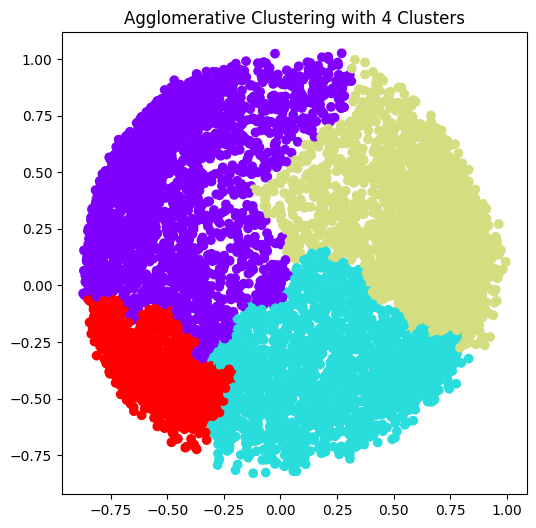

Silhouette Score for 4 clusters: 0.3557688361529489


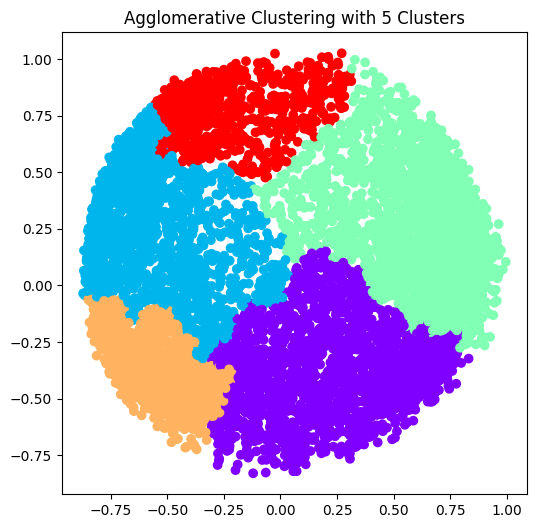

Silhouette Score for 5 clusters: 0.34504233916351684


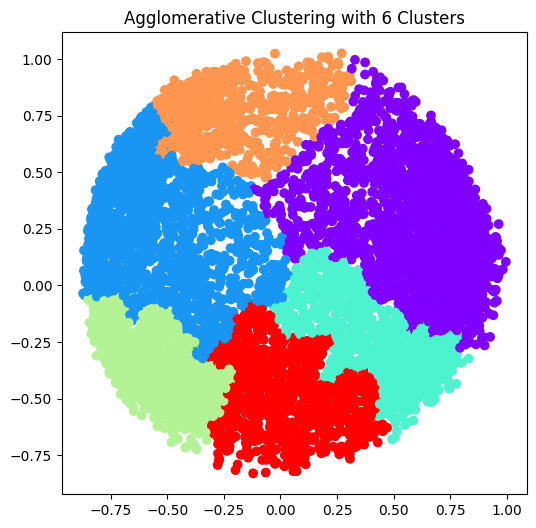

Silhouette Score for 6 clusters: 0.3132839936638658


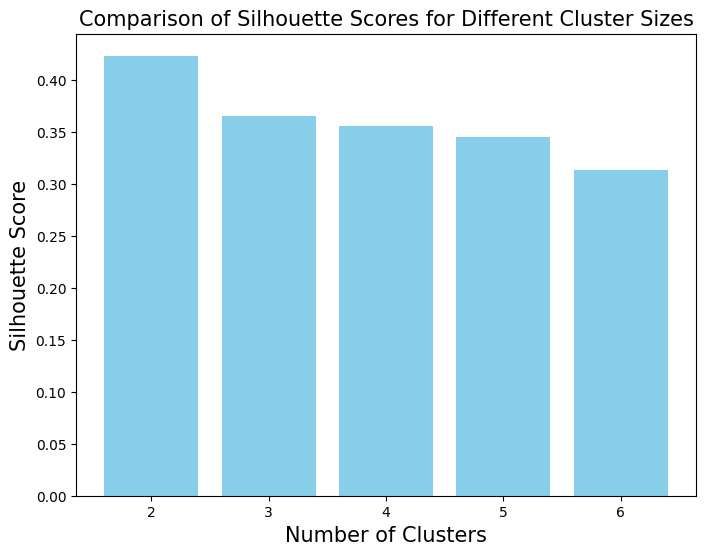


Silhouette Scores for Different Cluster Sizes:
2 clusters: 0.4232140653486487
3 clusters: 0.3648193444305517
4 clusters: 0.3557688361529489
5 clusters: 0.34504233916351684
6 clusters: 0.3132839936638658


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc


df = pd.read_csv('CC GENERAL.csv')

df.head()

# Dropping the 'CUST_ID' column
df = df.drop('CUST_ID', axis=1)

df.head()

df.describe()

df.isnull().sum()

df.dropna(inplace=True)

df.isnull().sum()

# Scaling the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Normalizing the data
df_normalized = normalize(df_scaled)


# Converting the numpy array back to a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)


# Assuming X_normalized is your normalized data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_principal = pca.fit_transform(df_normalized)  # Replace X_normalized with your normalized DataFrame
df_principal = pd.DataFrame(df_principal, columns=['P1', 'P2'])

print(df_principal.head())

# Print the explained variance ratio for PCA
print("\nExplained Variance Ratio by PCA Components:")
print(pca.explained_variance_ratio_)


# Visualizing the Dendrogram
plt.figure(figsize=(8, 8))
plt.title('Dendrogram')
dendrogram = shc.dendrogram(shc.linkage(df_principal.values, method='ward'))  # Use .values to get the numpy array
plt.show()


# Agglomerative Clustering with different cluster sizes and silhouette score evaluation
k_values = [2, 3, 4, 5, 6]
silhouette_scores = []

for k in k_values:
    ac = AgglomerativeClustering(n_clusters=k)
    cluster_labels = ac.fit_predict(df_principal)

    # Visualize the clustering results
    plt.figure(figsize=(6, 6))
    plt.scatter(df_principal['P1'], df_principal['P2'], c=cluster_labels, cmap='rainbow')
    plt.title(f'Agglomerative Clustering with {k} Clusters')
    plt.show()

    # Calculate and store silhouette score
    silhouette_avg = silhouette_score(df_principal, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print(f"Silhouette Score for {k} clusters: {silhouette_avg}")


# Visualizing the silhouette scores for different k values
plt.figure(figsize=(8, 6))
plt.bar(k_values, silhouette_scores, color='skyblue')
plt.xlabel('Number of Clusters', fontsize=15)
plt.ylabel('Silhouette Score', fontsize=15)
plt.title('Comparison of Silhouette Scores for Different Cluster Sizes', fontsize=15)
plt.show()

# Final output of silhouette scores for comparison
print("\nSilhouette Scores for Different Cluster Sizes:")
for i, k in enumerate(k_values):
    print(f"{k} clusters: {silhouette_scores[i]}")

